In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
X = df[['bedrooms', 'bathrooms', 'sqft_living']]
Y = df['price']

In [8]:
X = sm.add_constant(X)

In [9]:
X.head()

,const,bedrooms,bathrooms,sqft_living
0,1.0,3,1.00,1180
1,1.0,3,2.25,2570
2,1.0,2,1.00,770
3,1.0,4,3.00,1960
4,1.0,3,2.00,1680


In [10]:
model = sm.OLS(Y,X)

In [11]:
results = model.fit()

In [12]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7405.
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:56:32   Log-Likelihood:            -2.9996e+05
No. Observations:               21613   AIC:                         5.999e+05
Df Residuals:                   21609   BIC:                         6.000e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.485e+04   6913.667     10.826      

In [13]:
results.params

const          74847.140801
bedrooms      -57860.894321
bathrooms       7932.712223
sqft_living      309.392390
dtype: float64

In [ ]:
Y = -57860 bedrooms + 7932bathrooms + 309sqft + 74847

In [14]:
# predict the price of a 1800 sqft, 3 bedroom, 1.5 bathroom house
-57860*3+7932*1.5+1800*309+74847

469365.0

In [16]:
df[(df['bedrooms']==3)&(df['bathrooms']==1.5)&(df['sqft_living']==1800)]['price'].mean()

445000.0

<Axes: xlabel='price', ylabel='Count'>

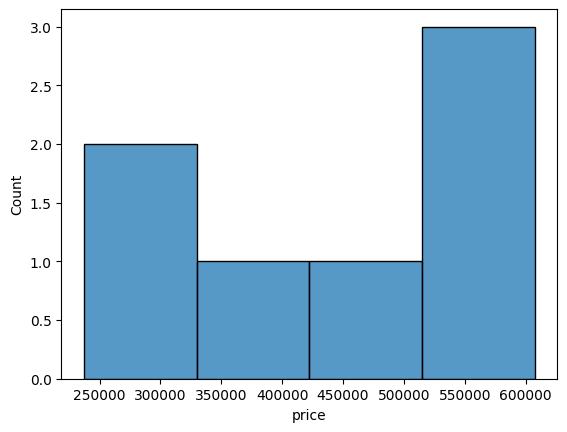

In [17]:
sns.histplot(df[(df['bedrooms']==3)&(df['bathrooms']==1.5)&(df['sqft_living']==1800)]['price'])

<Axes: xlabel='sqft_lot', ylabel='Count'>

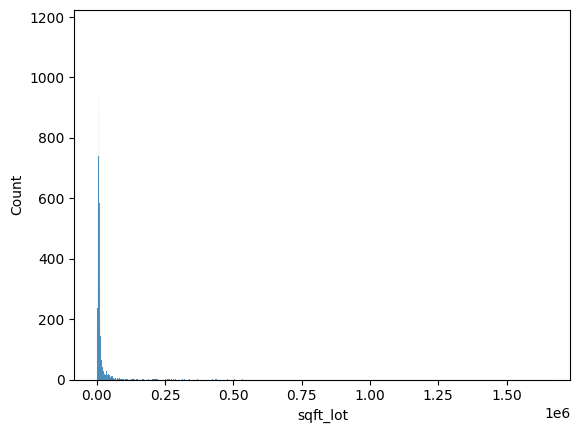

In [20]:
sns.histplot(df['sqft_lot'])

In [75]:
def house_type(sqft_lot, bedrooms):
    if sqft_lot <= 1000 and bedrooms == 1 or bedrooms == 2:
        return 'condo'
    elif sqft_lot > 1000 and sqft_lot < 3600 and bedrooms >=1 and bedrooms <=4:
        return 'single_family_home'
    elif sqft_lot > 3600 and bedrooms > 1:
        return 'large_home'
    

In [76]:
df['house_type'] = df.apply(lambda x: house_type(x['sqft_lot'], x['bedrooms']), axis=1)

In [32]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_type
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,single_family_home
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,single_family_home
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,condo
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,single_family_home
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,single_family_home


In [33]:
df.groupby('house_type').count()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
house_type,,,,,,,,,,,,,,,,,,,,,
condo,2765,2765,2765,2765,2765,2765,2765,2765,2765,2765,...,2765,2765,2765,2765,2765,2765,2765,2765,2765,2765
large_home,1935,1935,1935,1935,1935,1935,1935,1935,1935,1935,...,1935,1935,1935,1935,1935,1935,1935,1935,1935,1935
single_family_home,16794,16794,16794,16794,16794,16794,16794,16794,16794,16794,...,16794,16794,16794,16794,16794,16794,16794,16794,16794,16794


In [28]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [38]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_type
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,single_family_home
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,single_family_home
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,condo
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,single_family_home
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,single_family_home


In [36]:
# convert the type of home variable into a dummy variable
type_dummies = pd.get_dummies(df['house_type'], dtype=int)

In [37]:
type_dummies

,condo,large_home,single_family_home
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
21608,0,0,1
21609,0,0,1
21610,1,0,0
21611,0,0,1


In [39]:
df = pd.concat([df,type_dummies], axis=1)

In [40]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_type,condo,large_home,single_family_home
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,single_family_home,0,0,1
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,single_family_home,0,0,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,condo,1,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,single_family_home,0,0,1
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,single_family_home,0,0,1


In [41]:
X = df[['bedrooms', 'bathrooms', 'sqft_living','condo','large_home','single_family_home']]
Y = df['price']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     3769.
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:23:14   Log-Likelihood:            -2.9986e+05
No. Observations:               21613   AIC:                         5.997e+05
Df Residuals:                   21606   BIC:                         5.998e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.066e+05   2.54

In [42]:
results.params

const                 106554.140324
bedrooms              -53554.379682
bathrooms              11175.904495
sqft_living              308.912041
condo                   3286.005297
large_home            -19925.222172
single_family_home    -65273.416638
dtype: float64

In [49]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'house_type', 'condo',
       'large_home', 'single_family_home'],
      dtype='object')

In [51]:
X = df[['bedrooms', 'bathrooms', 'sqft_living','single_family_home','waterfront','grade','condition', 'sqft_lot','yr_renovated','sqft_living15']]
Y = df['price']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     3314.
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:28:50   Log-Likelihood:            -2.9756e+05
No. Observations:               21613   AIC:                         5.951e+05
Df Residuals:                   21602   BIC:                         5.952e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -7.321e+05   1.72

In [43]:
df['waterfront'].unique()

array([0, 1])

In [77]:
sfh = df[df['house_type']=='single_family_home']

In [78]:
sfh

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_type,condo,large_home,single_family_home
26,1794500383,20140626T000000,937000.0,3,1.75,2450,2691,2.0,0,0,...,0,98119,47.6386,-122.360,1760,3573,single_family_home,0,0,1
27,3303700376,20141201T000000,667000.0,3,1.00,1400,1581,1.5,0,0,...,0,98112,47.6221,-122.314,1860,3861,single_family_home,0,0,1
33,7589200193,20141110T000000,535000.0,3,1.00,1090,3000,1.5,0,0,...,0,98117,47.6889,-122.375,1570,5080,single_family_home,0,0,1
35,9547205180,20140613T000000,696000.0,3,2.50,2300,3060,1.5,0,0,...,2002,98115,47.6827,-122.310,1590,3264,single_family_home,0,0,1
43,9270200160,20141028T000000,685000.0,3,1.00,1570,2280,2.0,0,0,...,0,98119,47.6413,-122.364,1580,2640,single_family_home,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21601,5100403806,20150407T000000,467000.0,3,2.50,1425,1179,3.0,0,0,...,0,98125,47.6963,-122.318,1285,1253,single_family_home,0,0,1
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,0,98144,47.5699,-122.288,1400,1230,single_family_home,0,0,1
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,0,98116,47.5773,-122.409,1330,1265,single_family_home,0,0,1
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,98103,47.6993,-122.346,1530,1509,single_family_home,0,0,1


In [56]:
X = sfh[['bedrooms', 'bathrooms', 'sqft_living','waterfront','grade','condition','yr_renovated']]
Y = sfh['price']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     3417.
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:31:34   Log-Likelihood:            -2.2985e+05
No. Observations:               16794   AIC:                         4.597e+05
Df Residuals:                   16786   BIC:                         4.598e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -8.19e+05   1.98e+04    -41.380   

In [79]:
beds = pd.get_dummies(sfh['bedrooms'],dtype=int)

In [80]:
sfh = pd.concat([sfh,beds], axis=1)

In [81]:
sfh.rename(columns={1:'1_bed',3:'3_bed',4:'4_bed'}, inplace=True)

In [82]:
sfh.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,house_type,condo,large_home,single_family_home,1_bed,3_bed,4_bed
26,1794500383,20140626T000000,937000.0,3,1.75,2450,2691,2.0,0,0,...,-122.360,1760,3573,single_family_home,0,0,1,0,1,0
27,3303700376,20141201T000000,667000.0,3,1.00,1400,1581,1.5,0,0,...,-122.314,1860,3861,single_family_home,0,0,1,0,1,0
33,7589200193,20141110T000000,535000.0,3,1.00,1090,3000,1.5,0,0,...,-122.375,1570,5080,single_family_home,0,0,1,0,1,0
35,9547205180,20140613T000000,696000.0,3,2.50,2300,3060,1.5,0,0,...,-122.310,1590,3264,single_family_home,0,0,1,0,1,0
43,9270200160,20141028T000000,685000.0,3,1.00,1570,2280,2.0,0,0,...,-122.364,1580,2640,single_family_home,0,0,1,0,1,0


In [83]:
sfh.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'house_type', 'condo',
       'large_home', 'single_family_home', '1_bed', '3_bed', '4_bed'],
      dtype='object')

In [84]:
X = sfh[['1_bed','3_bed','4_bed', 'bathrooms', 'sqft_living','waterfront','grade','condition','yr_renovated']]
Y = sfh['price']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     190.6
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          5.34e-223
Time:                        20:38:29   Log-Likelihood:                -20199.
No. Observations:                1527   AIC:                         4.042e+04
Df Residuals:                    1518   BIC:                         4.046e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5.522e+05   3.37e+04    -16.404   

<Axes: xlabel='bedrooms', ylabel='price'>

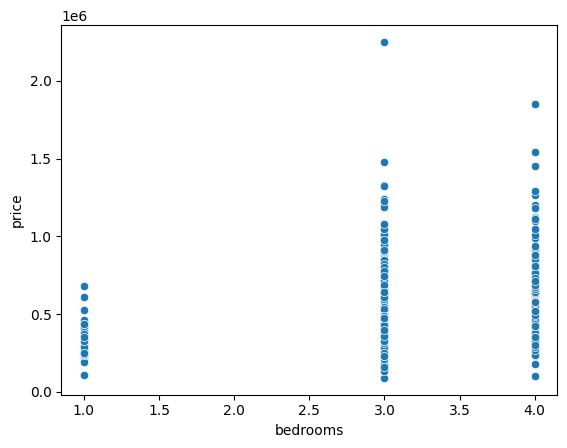

In [85]:
sns.scatterplot(x='bedrooms',y='price',data=sfh)

In [86]:
results.predict(X)

26       702666.957846
27       665876.126160
33       520432.331146
35       733447.900750
43       450105.843439
             ...      
21601    452778.794210
21604    486855.626142
21607    428133.095762
21608    475281.388444
21611    490283.117934
Length: 1527, dtype: float64

In [89]:
perf = pd.DataFrame([results.predict(X),Y])

In [92]:
perf = perf.T

In [94]:
perf.rename(columns={'Unnamed 0':'predicted_price'}, inplace=True)

In [96]:
perf['difference'] = perf['predicted_price'] - perf['price']

<Axes: xlabel='difference', ylabel='Count'>

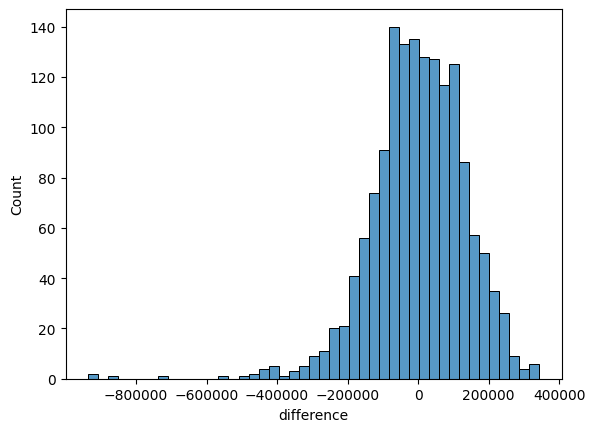

In [98]:
sns.histplot(perf['difference'])

In [99]:
perf['sq_diff'] = perf['difference']**2

In [101]:
np.sqrt(perf['sq_diff'].mean())

134476.1155659379

In [102]:
sfh['price'].mean()

495975.00785854616

In [103]:
np.sqrt(perf['sq_diff'].mean()) / sfh['price'].mean()

0.27113486251365904

In [106]:
X = df[df['price']<=500000][['bedrooms', 'bathrooms', 'sqft_living','waterfront','grade','condition','yr_renovated']]
Y = df[df['price']<=500000]['price']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     470.7
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:47:06   Log-Likelihood:            -1.5993e+05
No. Observations:               12560   AIC:                         3.199e+05
Df Residuals:                   12552   BIC:                         3.199e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.533e+04   8889.887      3.974   

<Axes: xlabel='sqft_living', ylabel='price'>

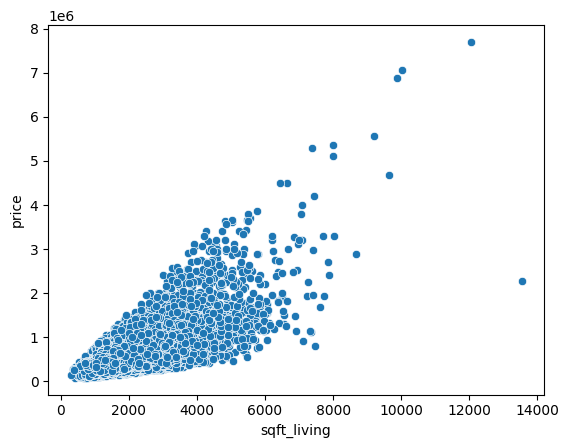

In [107]:
sns.scatterplot(x='sqft_living',y='price',data=df)

In [109]:
df.date = pd.to_datetime(df['date'])

In [111]:
price_over_time = df.groupby('date')['price'].mean()

In [112]:
price_over_time

date
2014-05-02    5.262515e+05
2014-05-03    4.669700e+05
2014-05-04    5.766900e+05
2014-05-05    5.809386e+05
2014-05-06    5.340479e+05
                  ...     
2015-05-13    5.116239e+05
2015-05-14    6.034363e+05
2015-05-15    4.500000e+05
2015-05-24    4.455000e+05
2015-05-27    1.310000e+06
Name: price, Length: 372, dtype: float64

In [ ]:
(May 3 price - May 2 price) / may 2 price

In [113]:
price_over_time = price_over_time.to_frame()

In [115]:
price_over_time['shifted_price'] = price_over_time['price'].shift(1)

In [117]:
price_over_time['% change'] = (price_over_time['price'] - price_over_time['shifted_price'])/price_over_time['shifted_price']

In [118]:
price_over_time

,price,shifted_price,% change
date,,,
2014-05-02,5.262515e+05,NaN,NaN
2014-05-03,4.669700e+05,526251.492537,-0.112649
2014-05-04,5.766900e+05,466970.000000,0.234962
2014-05-05,5.809386e+05,576690.000000,0.007367
2014-05-06,5.340479e+05,580938.607143,-0.080715
...,...,...,...
2015-05-13,5.116239e+05,547568.877551,-0.065645
2015-05-14,6.034363e+05,511623.870968,0.179453
2015-05-15,4.500000e+05,603436.272727,-0.254271
